In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('max_columns',0)
%matplotlib inline

In [3]:
df = pd.read_csv('MA_Public_Schools_2017.csv')
ipc = pd.read_excel('inc0311.xls')

In [8]:
df.head()

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,...,% MCAS_6thGrade_English_P,MCAS_6thGrade_English_NI #,% MCAS_6thGrade_English_NI,MCAS_6thGrade_English_W/F #,% MCAS_6thGrade_English_W/F,MCAS_6thGrade_English_Stud. Incl. #,MCAS_6thGrade_English_CPI,MCAS_6thGrade_English_SGP,MCAS_6thGrade_English_Incl. in SGP(#),MCAS_7thGrade_English_P+A #,% MCAS_7thGrade_English_P+A,MCAS_7thGrade_English_A #,% MCAS_7thGrade_English_A,MCAS_7thGrade_English_P #,% MCAS_7thGrade_English_P,MCAS_7thGrade_English_NI #,% MCAS_7thGrade_English_NI,MCAS_7thGrade_English_W/F #,% MCAS_7thGrade_English_W/F,MCAS_7thGrade_English_Stud. Incl. #,MCAS_7thGrade_English_CPI,MCAS_7thGrade_English_SGP,MCAS_7thGrade_English_Incl. in SGP(#),MCAS_8thGrade_English_P+A #,% MCAS_8thGrade_English_P+A,MCAS_8thGrade_English_A #,% MCAS_8thGrade_English_A,MCAS_8thGrade_English_P #,% MCAS_8thGrade_English_P,MCAS_8thGrade_English_NI #,% MCAS_8thGrade_English_NI,MCAS_8thGrade_English_W/F #,% MCAS_8thGrade_English_W/F,MCAS_8thGrade_English_Stud. Incl. #,MCAS_8thGrade_English_CPI,MCAS_8thGrade_English_SGP,MCAS_8thGrade_English_Incl. in SGP(#),MCAS_10thGrade_English_P+A #,% MCAS_10thGrade_English_P+A,MCAS_10thGrade_English_A #,% MCAS_10thGrade_English_A,MCAS_10thGrade_English_P #,% MCAS_10thGrade_English_P,MCAS_10thGrade_English_NI #,% MCAS_10thGrade_English_NI,MCAS_10thGrade_English_W/F #,% MCAS_10thGrade_English_W/F,MCAS_10thGrade_English_Stud. Incl. #,MCAS_10thGrade_English_CPI,MCAS_10thGrade_English_SGP,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,2351,781-982-2160,781-982-0061,"09,10,11,12",Abington,10000,0,0,0,0,0,0,0,0,0,0,124,109,123,92,4,452,24.0,5.3,11.0,2.4,44.0,9.7,130.0,28.8,97.0,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,204.0,15.8,451.0,9489496.0,74662.0,127.0,23365711.18,1939.0,12050.39,27229100.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,94.0,60.0,48.0,57.0,46.0,2.0,2.0,5.0,4.0,124.0,98.8,56.0,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
1,10003,Beaver Brook Elementary School,Public School,Principal,Catherine Zinni,1 Ralph Hamlin Lane,NaN,Abington,MA,2351,781-982-2185,781-982-2187,"01,02,03,04",Abington,10000,0,0,125,164,148,143,0,0,0,0,0,0,0,0,0,580,61.0,10.5,42.0,7.2,77.0,13.3,215.0,37.1,135.0,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,325.0,24.6,643.0,9489496.0,74662.0,127.0,23365711.18,1939.0,12050.39,27229100.8,...,NaN,NaN,NaN,NaN,NaN,NaN

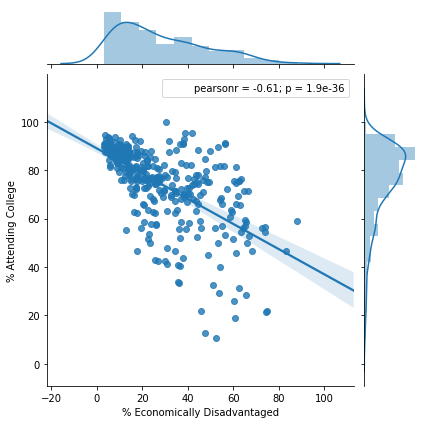

In [18]:
sns.jointplot(data=df, x='% Economically Disadvantaged', y='% Attending College', kind='reg')

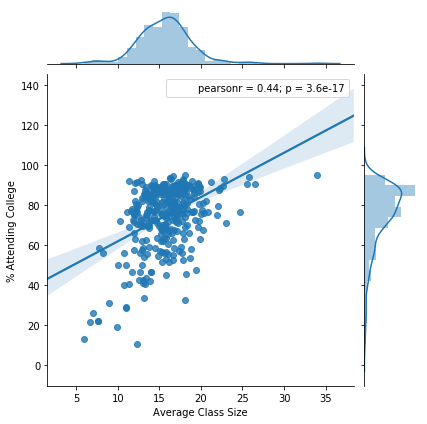

In [10]:
sns.jointplot(data=df, x='Average Class Size', y='% Attending College', kind='reg')

In [47]:
def fix(s):
    return s[0].upper() + s[1:].lower()

In [41]:
ipc['Town'] = ipc['Town'].astype(str).apply(fix)

In [54]:
df['Town'] = df['Town'].apply(fix)

In [55]:
sals = df[['Town','Average Salary']]

In [62]:
sals = sals.drop_duplicates()

In [73]:
sals_ipc = pd.merge(sals,ipc,how='inner',left_on='Town',right_on='Town')

In [78]:
sals['Town'] = sals['Town'].str.strip()
ipc['Town'] = ipc['Town'].str.strip()

In [82]:
sals_ipc = pd.merge(sals,ipc,how='inner',left_on='Town',right_on='Town')

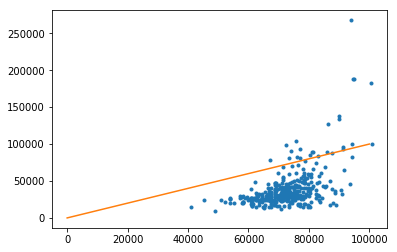

In [97]:
plt.plot(sals_ipc['Average Salary'], sals_ipc['Avg_income_pc'],marker='.',linestyle='none')
plt.plot([0,100000],[0,100000])
plt.show()

In [99]:
sals_ipc['is_better'] = sals_ipc['Average Salary'] > sals_ipc['Avg_income_pc']

In [106]:
sals_ipc.pivot_table(columns='is_better',values='Town',aggfunc='count')

is_better,False,True
Town,60,335


In [36]:
high_schools = df[df['12_Enrollment'] > 0].copy()

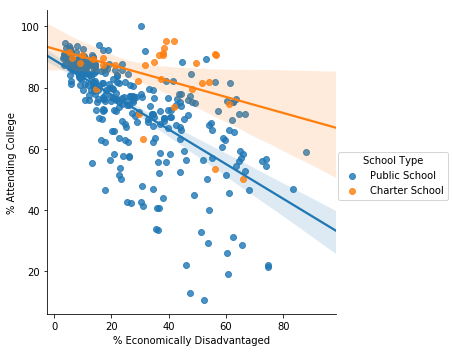

In [17]:
sns.lmplot(data=high_schools, x='% Economically Disadvantaged', y='% Attending College', hue='School Type')

In [21]:
df['School Type'].unique()

array(['Public School', 'Charter School'], dtype=object)

In [24]:
public = df[df['School Type'] == 'Public School']

In [30]:
charter = df[df['School Type'] == 'Charter School']

In [37]:
high_schools['adj_class_size'] = np.absolute(high_schools['Average Class Size'].mean() - high_schools['Average Class Size'])

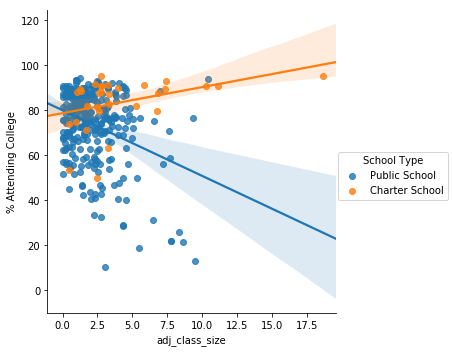

In [38]:
sns.lmplot(data=high_schools, x='adj_class_size', y='% Attending College', hue='School Type')

In [40]:
public['Average Salary'].mean()

74036.64104013567

In [42]:
charter

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,...,% MCAS_6thGrade_English_P,MCAS_6thGrade_English_NI #,% MCAS_6thGrade_English_NI,MCAS_6thGrade_English_W/F #,% MCAS_6thGrade_English_W/F,MCAS_6thGrade_English_Stud. Incl. #,MCAS_6thGrade_English_CPI,MCAS_6thGrade_English_SGP,MCAS_6thGrade_English_Incl. in SGP(#),MCAS_7thGrade_English_P+A #,% MCAS_7thGrade_English_P+A,MCAS_7thGrade_English_A #,% MCAS_7thGrade_English_A,MCAS_7thGrade_English_P #,% MCAS_7thGrade_English_P,MCAS_7thGrade_English_NI #,% MCAS_7thGrade_English_NI,MCAS_7thGrade_English_W/F #,% MCAS_7thGrade_English_W/F,MCAS_7thGrade_English_Stud. Incl. #,MCAS_7thGrade_English_CPI,MCAS_7thGrade_English_SGP,MCAS_7thGrade_English_Incl. in SGP(#),MCAS_8thGrade_English_P+A #,% MCAS_8thGrade_English_P+A,MCAS_8thGrade_English_A #,% MCAS_8thGrade_English_A,MCAS_8thGrade_English_P #,% MCAS_8thGrade_English_P,MCAS_8thGrade_English_NI #,% MCAS_8thGrade_English_NI,MCAS_8thGrade_English_W/F #,% MCAS_8thGrade_English_W/F,MCAS_8thGrade_English_Stud. Incl. #,MCAS_8thGrade_English_CPI,MCAS_8thGrade_English_SGP,MCAS_8thGrade_English_Incl. in SGP(#),MCAS_10thGrade_English_P+A #,% MCAS_10thGrade_English_P+A,MCAS_10thGrade_English_A #,% MCAS_10thGrade_English_A,MCAS_10thGrade_English_P #,% MCAS_10thGrade_English_P,MCAS_10thGrade_English_NI #,% MCAS_10thGrade_English_NI,MCAS_10thGrade_English_W/F #,% MCAS_10thGrade_English_W/F,MCAS_10thGrade_English_Stud. Incl. #,MCAS_10thGrade_English_CPI,MCAS_10thGrade_English_SGP,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
476,4450105,Abby Kelley Foster Charter Public School,Charter School,Principal,Brian Haas,10 New Bond Street,NaN,Worcester,MA,1606,508-854-8400,508-854-8484,"K,01,02,03,04,05,06,07,08,09,10,11,12",Abby Kelley Foster Charter Public (District),4450000,0,116,113,118,122,119,118,127,121,115,96,86,93,81,0,1425,868.0,60.9,102.0,7.2,147.0,10.3,730.0,51.2,530.0,37.2,48.5,4.0,22.0,22.9,0.1,0.1,2.3,47.3,52.7,750.0,18.7,1420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,99.0,56.0,60.0,37.0,39.0,1.0,1.0,0.0,0.0,94.0,99.7,71.5,94.0,NaN,NaN,46.0,69.0,61.0,Level 2,Not meeting gap narrowing goals,69.0,61.0
477,4120530,Academy Of the Pacific Rim Charter Public School,Charter School,Principal,Spencer Blasdale,1 Westinghouse Plaza,NaN,Hyde Park,MA,2136,617-361-0050,617-361-0045,"05,06,07,08,09,10,11,12",Academy Of the Pacific Rim Charter Public (Dis...,4120000,0,0,0,0,0,0,79,77,81,79,64,55,43,49,0,527,130.0,24.7,62.0,11.8,128.0,24.3,307.0,58.3,202.0,38.3,58.1,0.9,27.3,10.4,0.0,0.2,3.0,47.

In [33]:
racial_demo = df[['School Code','School Name','School Type','District Name','District Code','Zip','% African American','% Asian','% Hispanic','% White','% Native American','% Native Hawaiian, Pacific Islander','% Multi-Race, Non-Hispanic']]

In [34]:
racial_demo.head()

,School Code,School Name,School Type,District Name,District Code,Zip,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic"
0,10505,Abington High,Public School,Abington,10000,2351,2.2,1.5,9.1,85.8,0.2,0.2,0.9
1,10003,Beaver Brook Elementary School,Public School,Abington,10000,2351,1.9,1.9,6.7,88.4,0.5,0.2,0.3
2,10002,Center Elementary School,Public School,Abington,10000,2351,3.9,3.0,8.4,84.7,0.0,0.0,0.0
3,10405,Frolio Middle School,Public School,Abington,10000,2351,2.4,1.8,6.1,89.3,0.0,0.0,0.3
4,10015,Woodsdale Elementary School,Public School,Abington,10000,2351,2.0,1.4,4.2,92.1,0.0,0.0,0.3


In [35]:
racial_demo[['School Type', '% African American','% Asian','% Hispanic','% White','% Native American','% Native Hawaiian, Pacific Islander','% Multi-Race, Non-Hispanic']].groupby('School Type').mean()

,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic"
School Type,,,,,,,
Charter School,28.041026,3.900000,32.642308,31.782051,0.297436,0.094872,3.242308
Public School,7.848081,6.145598,18.395993,63.670993,0.230643,0.098138,3.612190


In [36]:
racial_demo.pivot_table(index = 'School Type', values=['% African American','% Asian','% Hispanic','% White','% Native American','% Native Hawaiian, Pacific Islander','% Multi-Race, Non-Hispanic'])

,% African American,% Asian,% Hispanic,"% Multi-Race, Non-Hispanic",% Native American,"% Native Hawaiian, Pacific Islander",% White
School Type,,,,,,,
Charter School,28.041026,3.900000,32.642308,3.242308,0.297436,0.094872,31.782051
Public School,7.848081,6.145598,18.395993,3.612190,0.230643,0.098138,63.670993


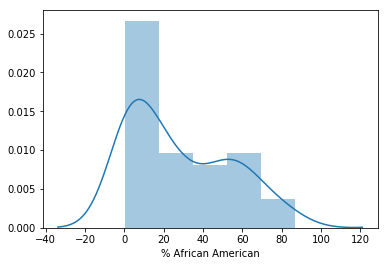

In [32]:
sns.distplot(racial_demo.loc[racial_demo['School Type'] == 'Charter School','% African American'].dropna(),bins=5)

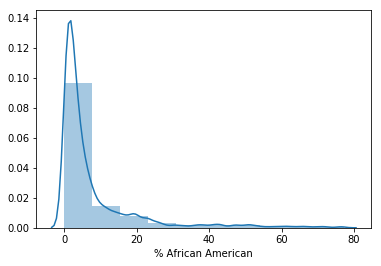

In [31]:
sns.distplot(racial_demo.loc[racial_demo['School Type'] == 'Public School','% African American'].dropna(),bins=10)

In [39]:
race_by_zip = racial_demo[['School Type','Zip','% African American','% Asian','% Hispanic','% White','% Native American','% Native Hawaiian, Pacific Islander','% Multi-Race, Non-Hispanic']].groupby(['Zip','School Type']).mean()

In [51]:
race_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 494 entries, (1001, Public School) to (2790, Public School)
Data columns (total 7 columns):
% African American                     490 non-null float64
% Asian                                490 non-null float64
% Hispanic                             490 non-null float64
% White                                490 non-null float64
% Native American                      490 non-null float64
% Native Hawaiian, Pacific Islander    490 non-null float64
% Multi-Race, Non-Hispanic             490 non-null float64
dtypes: float64(7)
memory usage: 32.0+ KB


In [54]:
race_by_zip.head()

,,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic"
Zip,School Type,,,,,,,
1001,Public School,2.683333,4.016667,7.950000,82.850000,0.00,0.016667,2.466667
1002,Public School,7.616667,10.400000,17.816667,56.766667,0.05,0.083333,7.233333
1005,Public School,4.050000,0.700000,3.600000,89.325000,0.00,0.075000,2.275000
1007,Public School,2.020000,1.780000,3.980000,89.200000,0.14,0.140000,2.760000
1010,Public School,3.500000,1.800000,0.400000,94.400000,0.00,0.000000,0.000000


In [79]:
idx = pd.IndexSlice

p_and_c = [i for i in racial_demo['Zip'] if len(race_by_zip.loc[idx[i]]) == 2]
test_zips = race_by_zip.loc[idx[p_and_c]]

In [85]:
samp1 = test_zips.loc[idx[1022]].iloc[0]
samp2 = test_zips.loc[idx[1022]].iloc[1]

samp1, samp2

(% African American                     24.9
 % Asian                                 2.7
 % Hispanic                             30.5
 % White                                39.1
 % Native American                       0.0
 % Native Hawaiian, Pacific Islander     0.0
 % Multi-Race, Non-Hispanic              2.7
 Name: Charter School, dtype: float64,
 % African American                      4.1
 % Asian                                 0.8
 % Hispanic                             18.0
 % White                                73.8
 % Native American                       0.0
 % Native Hawaiian, Pacific Islander     0.3
 % Multi-Race, Non-Hispanic              3.0
 Name: Public School, dtype: float64)

In [110]:
from scipy.stats import chi2_contingency

stack = np.vstack((samp1.values, samp2.values))

chi2, p, dof, expected = chi2_contingency(stack + 0.1)

print(p)

4.21225973461e-05


In [118]:
test_zips.head(6)

% African American             ...              % Multi-Race, Non-Hispanic
Zip  School Type                                    ...                                        
1022 Charter School               24.90             ...                                2.700000
     Public School                 4.10             ...                                3.000000
1027 Charter School                0.50             ...                                9.200000
     Public School                 1.20             ...                                2.457143
1035 Charter School                4.70             ...                               13.200000
     Public School                 2.95             ...                                3.400000

[6 rows x 7 columns]

In [162]:
def compare_dist(i):        
    dist1 = test_zips.loc[idx[i[0]]].iloc[0]
    dist2 = test_zips.loc[idx[i[0]]].iloc[1]
       
    stack = np.vstack((dist1.values, dist2.values))
    chi2, p, dof, expected = chi2_contingency(stack + 0.1)
    
    return p

In [164]:
test_zips['p_value'] = test_zips.index.map(compare_dist)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\contingency.py:242: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [179]:
sum(test_zips['p_value'] < 0.05)/len(test_zips['p_value'])

0.39344262295081966

In [180]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [182]:
x, y = ecdf(test_zips['p_value'])

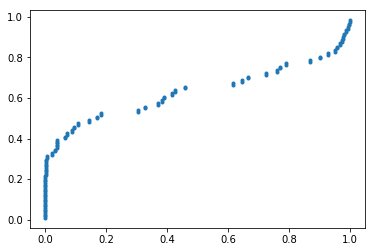

In [183]:
plt.plot(x, y, marker='.', linestyle='none')

In [184]:
diff_test_zips = test_zips[test_zips['p_value'] < 0.05]

In [190]:
diff_test_zips

% African American    % Asian      ...       % Multi-Race, Non-Hispanic       p_value
Zip  School Type                                        ...                                               
1022 Charter School           24.900000   2.700000      ...                         2.700000  1.015101e-04
     Public School             4.100000   0.800000      ...                         3.000000  1.015101e-04
1035 Charter School            4.700000  17.600000      ...                        13.200000  5.306687e-04
     Public School             2.950000   1.650000      ...                         3.400000  5.306687e-04
1108 Charter School           41.800000   1.900000      ...                         5.500000  1.463431e-03
     Public School            18.337500   5.812500      ...                         1.837500  1.463431e-03
1129 Charter School           29.800000   4.100000      ...                         5.000000  3.038050e-02
     Public School            15.400000   1.950000      ...                         2.600000  3.038050e-02
1420 Charter School            4.300000   2.200000      ...                         1.600000  4.102993e-04
     Public School             5.300000   4.033333      ...                         6.355556  4.102993e-04
1605 Charter School           47.100000   0.100000      ...                         3.600000  4.144895e-08
     Public School            13.711111  10.000000      ...                         4.722222  4.144895e-08
1606 Charter School           48.500000   4.000000      ...                         2.300000  2.012077e-03
     Public School            17.200000   4.757143      ...                         4.814286  2.012077e-03
1752 Charter School            2.400000  19.200000      ...                         5.400000  2.068836e-05
     Public School             3.528571   5.057143      ...                         3.014286  2.068836e-05
1906 Charter School           35.100000  11.500000      ...                         1.200000  1.084178e-07
     Public School             4.033333   5.750000      ...                         1.866667  1.084178e-07
2035 Charter School           36.600000  10.000000      ...                         5.900000  2.020783e-07
     Public School             4.020000   4.100000      ...                         2.300000  2.020783e-07
2038 Charter School            1.600000  23.000000      ...                         3.100000  3.794233e-02
     Public School             1.500000   4.858333      ...                         1.875000  3.794233e-02
2061 Charter School           25.100000   4.600000      ...                         4.600000  4.177003e-05
     Public School             0.450000   1.925000      ...                         2.200000  4.177003e-05
2115 Charter School           44.600000   1.900000      ...                         2.200000  1.181870e-19
     Public School             8.000000  29.000000      ...                         3.800000  1.181870e-19
2120 Charter School           56.400000   0.800000      ...                         1.100000  3.926887e-02
     Public School            34.425000   6.775000      ...                         2.200000  3.926887e-02
2122 Charter School           65.350000   2.450000      ...                         3.300000  1.345279e-03
     Public School            38.640000  20.900000      ...                         3.460000  1.345279e-03
2125 Charter School           27.500000   2.200000      ...                         2.400000  1.487423e-07
     Public School            40.742857   7.614286      ...                         2.385714  1.487423e-07
2127 Charter School           46.800000   5.700000      ...                         1.900000  2.225354e-02
     Public School            34.360000   8.560000      ...                         3.580000  2.225354e-02
2131 Charter School           54.500000   1.900000      ...                         2.000000  3.896903e-02
     Public School            33.237500   2.500000      ...   

In [191]:
df[df.Zip == 2140]

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,...,% MCAS_6thGrade_English_P,MCAS_6thGrade_English_NI #,% MCAS_6thGrade_English_NI,MCAS_6thGrade_English_W/F #,% MCAS_6thGrade_English_W/F,MCAS_6thGrade_English_Stud. Incl. #,MCAS_6thGrade_English_CPI,MCAS_6thGrade_English_SGP,MCAS_6thGrade_English_Incl. in SGP(#),MCAS_7thGrade_English_P+A #,% MCAS_7thGrade_English_P+A,MCAS_7thGrade_English_A #,% MCAS_7thGrade_English_A,MCAS_7thGrade_English_P #,% MCAS_7thGrade_English_P,MCAS_7thGrade_English_NI #,% MCAS_7thGrade_English_NI,MCAS_7thGrade_English_W/F #,% MCAS_7thGrade_English_W/F,MCAS_7thGrade_English_Stud. Incl. #,MCAS_7thGrade_English_CPI,MCAS_7thGrade_English_SGP,MCAS_7thGrade_English_Incl. in SGP(#),MCAS_8thGrade_English_P+A #,% MCAS_8thGrade_English_P+A,MCAS_8thGrade_English_A #,% MCAS_8thGrade_English_A,MCAS_8thGrade_English_P #,% MCAS_8thGrade_English_P,MCAS_8thGrade_English_NI #,% MCAS_8thGrade_English_NI,MCAS_8thGrade_English_W/F #,% MCAS_8thGrade_English_W/F,MCAS_8thGrade_English_Stud. Incl. #,MCAS_8thGrade_English_CPI,MCAS_8thGrade_English_SGP,MCAS_8thGrade_English_Incl. in SGP(#),MCAS_10thGrade_English_P+A #,% MCAS_10thGrade_English_P+A,MCAS_10thGrade_English_A #,% MCAS_10thGrade_English_A,MCAS_10thGrade_English_P #,% MCAS_10thGrade_English_P,MCAS_10thGrade_English_NI #,% MCAS_10thGrade_English_NI,MCAS_10thGrade_English_W/F #,% MCAS_10thGrade_English_W/F,MCAS_10thGrade_English_Stud. Incl. #,MCAS_10thGrade_English_CPI,MCAS_10thGrade_English_SGP,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
309,490050,Peabody,Public School,Principal,Jennifer Ford,70 Rindge Avenue,NaN,Cambridge,MA,2140,617-349-6530,617-349-6538,"PK,K,01,02,03,04,05",Cambridge,490000,48,49,45,44,44,41,45,0,0,0,0,0,0,0,0,316,67.0,21.2,13.0,4.1,70.0,22.2,131.0,41.5,77.0,24.4,24.4,12.3,6.6,49.1,0.0,0.0,7.6,47.8,52.2,140.0,19.5,318.0,50658612.0,78456.0,646.0,1.683076e+08,6428.0,26183.5,1.943220e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Level 1,Meeting gap narrowing goals,57.0,100.0,86.0,Level 2,One or more schools in the district classified...,67.0,59.0
311,490315,Rindge Avenue Upper School,Public School,Principal,JULIE CRAVEN,70 Rindge Avenue,NaN,Cambridge,MA,2140,617-349-4060,617-349-6037,"06,07,08",Cambridge,490000,0,0,0,0,0,0,0,96,94,85,0,0,0,0,0,275,46.0,16.7,4.0,1.5,73.0,26.5,118.0,42.9,77.0,28.0,30.9,9.8,10.5,40.0,0.7,0.4,7.6,52.7,47.3,148.0,19.0,278.0,50658612.0,78456.0,646.0,1.683076e+08,6428.0,26183.5,1.943220e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na